In [1]:
import pandas as pd 
import ast 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
dataset = load_dataset ('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


In [2]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title'] == 'Data Analyst')]

In [3]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

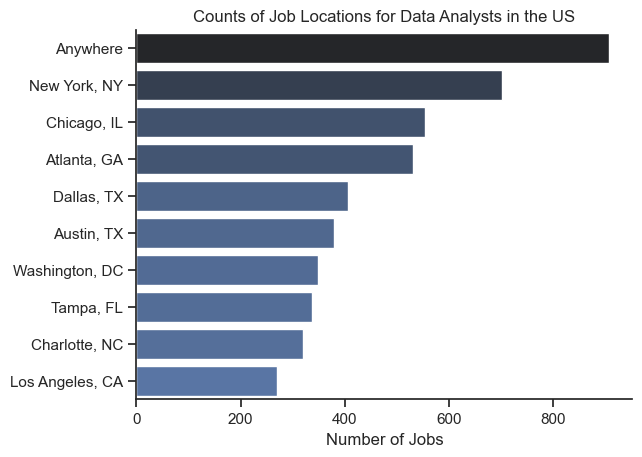

In [4]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analysts in the US')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()

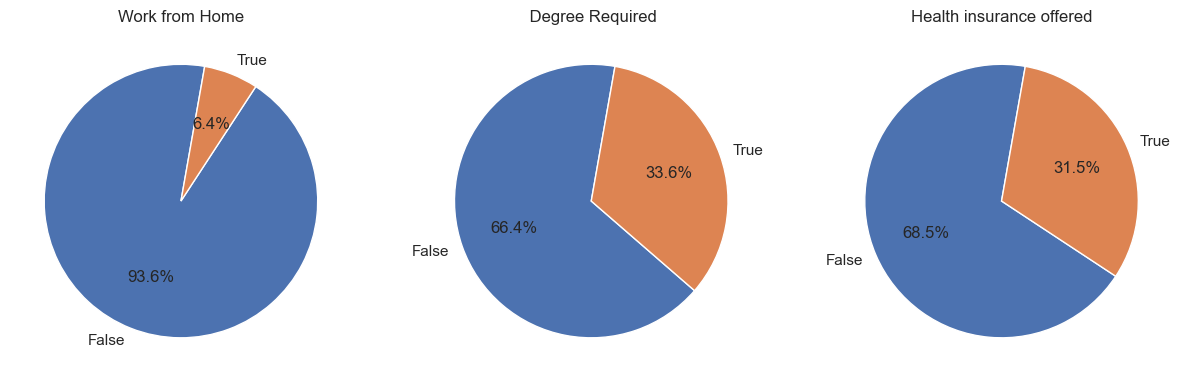

In [5]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15,5)
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': ' Degree Required',
    'job_health_insurance': 'Health insurance offered'
}
 
for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=80)
    ax[i].set_title(title)
# plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)  
plt.show()

In [6]:
df_US_companies = df_DA_US['company_name'].value_counts().head(10).to_frame()
df_US_companies

,count
company_name,
Robert Half,356
Insight Global,277
Dice,113
Apex Systems,111
Aston Carter,82
Jobot,80
Collabera,76
SynergisticIT,71
Booz Allen Hamilton,67


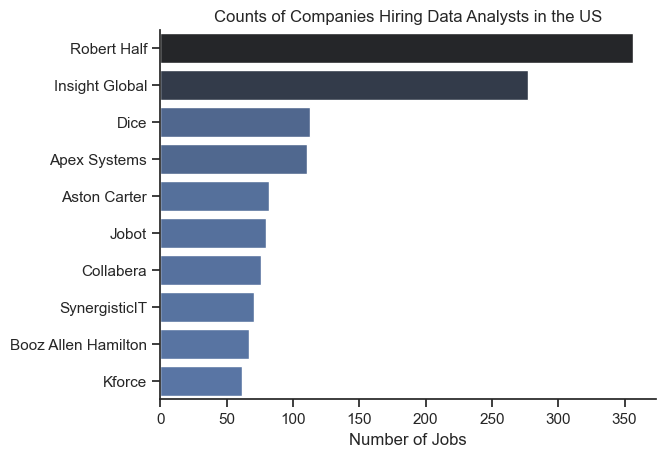

In [7]:
sns.set_theme(style='ticks')
sns.barplot(data= df_US_companies, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies Hiring Data Analysts in the US')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()


In [8]:
df_Kenya = df[df['job_country'] == 'Kenya']
job_titles = df_Kenya['job_title_short'].value_counts().to_frame()

In [9]:
df_DA_Kenya = df_Kenya[df_Kenya['job_title'] == 'Data Analyst']
df_DA_Kenya_exploded = df_DA_Kenya.explode('job_skills')
df_plot = df_DA_Kenya_exploded.groupby('job_skills')['job_skills'].value_counts().sort_values(ascending=False).head(10).to_frame()
df_plot


,count
job_skills,
sql,25
python,24
tableau,20
excel,20
r,18
power bi,12
looker,7
aws,7
azure,4


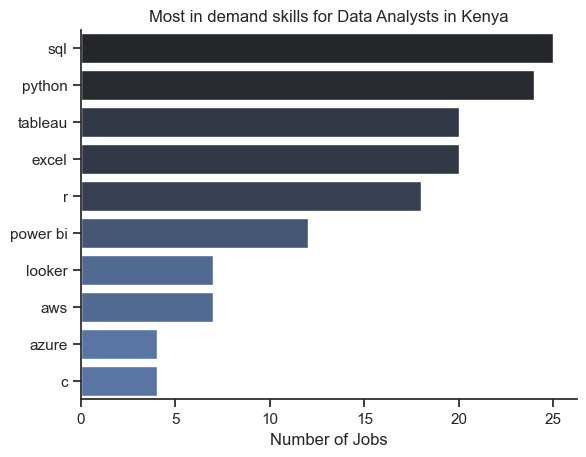

In [10]:
sns.barplot(data=df_plot, x='count', y='job_skills', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Most in demand skills for Data Analysts in Kenya')
plt.ylabel ('')
plt.xlabel('Number of Jobs')
plt.show()


In [11]:
job_titles 


,count
job_title_short,
Data Analyst,548
Software Engineer,314
Data Scientist,242
Business Analyst,217
Data Engineer,174
Cloud Engineer,56
Senior Data Analyst,52
Senior Data Scientist,46
Senior Data Engineer,37


Text(0.5, 1.0, 'Most in demand job titles in Kenya')

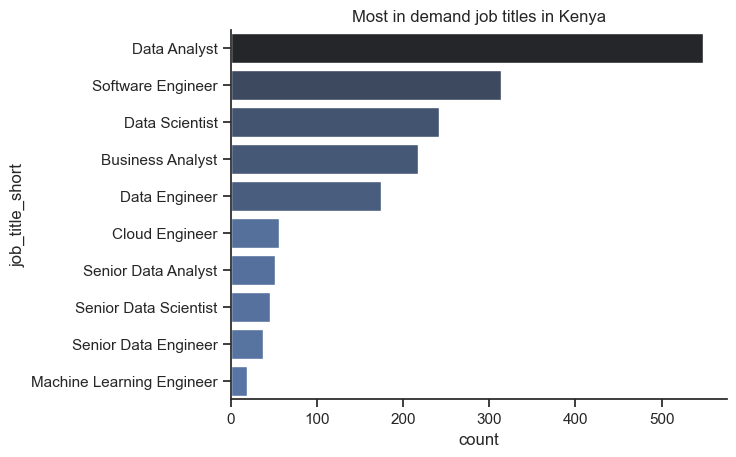

In [12]:
sns.barplot(data=job_titles, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Most in demand job titles in Kenya')


In [13]:
df_Kenya

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1059,Cloud Engineer,Navigation & Infrastructure Engineer,"Nairobi, Kenya",via Trabajo.org,Full-time,False,Kenya,2023-08-06 13:50:21,False,False,Kenya,None,NaN,NaN,Kenya Airways,None,None
1705,Data Analyst,"Data Analytics Program Manager, VisionFund Int...","Nairobi, Kenya",via MyJobMag,Full-time,False,Kenya,2023-02-09 13:40:24,False,False,Kenya,None,NaN,NaN,World Vision Kenya,[tableau],{'analyst_tools': ['tableau']}
2089,Data Scientist,Data Scientist,"Nairobi, Kenya",via Trabajo.org,Full-time,False,Kenya,2023-05-25 13:39:11,False,False,Kenya,None,NaN,NaN,Medtronic Labs,"[go, python, aws, docker]","{'cloud': ['aws'], 'other': ['docker'], 'progr..."
2279,Data Scientist,Director of Data,Kenya,via Trabajo.org,Full-time,False,Kenya,2023-05-25 13:39:14,True,False,Kenya,None,NaN,NaN,KOKO NETWORKS,None,None
3482,Data Analyst,Data Analyst,"Nairobi, Kenya",via UNjobnet,Full-time,False,Kenya,2023-03-22 13:47:56,False,False,Kenya,None,NaN,NaN,United Nations Human Settlements Programme,[c],{'programming': ['c']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783724,Data Scientist,Data Science Intern at Dataposit,"Nairobi, Kenya",via BeBee Kenya,Full-time and Internship,False,Kenya,2023-09-18 06:19:21,False,False,Kenya,None,NaN,NaN,Dataposit,"[r, python, matlab, java, c]","{'programming': ['r', 'python', 'matlab', 'jav..."
784558,Cloud Engineer,Data Insights Analytics Cloud Support Engineer,"Nairobi, Kenya",via BrighterMonday,Full-time,False,Kenya,2023-11-16 06:31:16,False,False,Kenya,None,NaN,NaN,confidential,"[python, r, ruby, ruby, go, java, c#, javascri...","{'cloud': ['aws', 'redshift', 'oracle'], 'data..."
784798,Senior Data Scientist,Senior Analyst,"Nairobi, Kenya",via BeBee Kenya,Full-time,False,Kenya,2023-10-29 06:22:25,False,False,Kenya,None,NaN,NaN,Habitat for Humanity International,"[sas, sas, r, tableau]","{'analyst_tools': ['sas', 'tableau'], 'program..."
784991,Cloud Engineer,Senior Engineering Technician,"Nairobi, Kenya",via Trabajo.org,Full-time,False,Kenya,2023-08-12 06:19:49,True,False,Kenya,None,NaN,NaN,Kenya Marine and Fisheries Research Institute ...,[c],{'programming': ['c']}


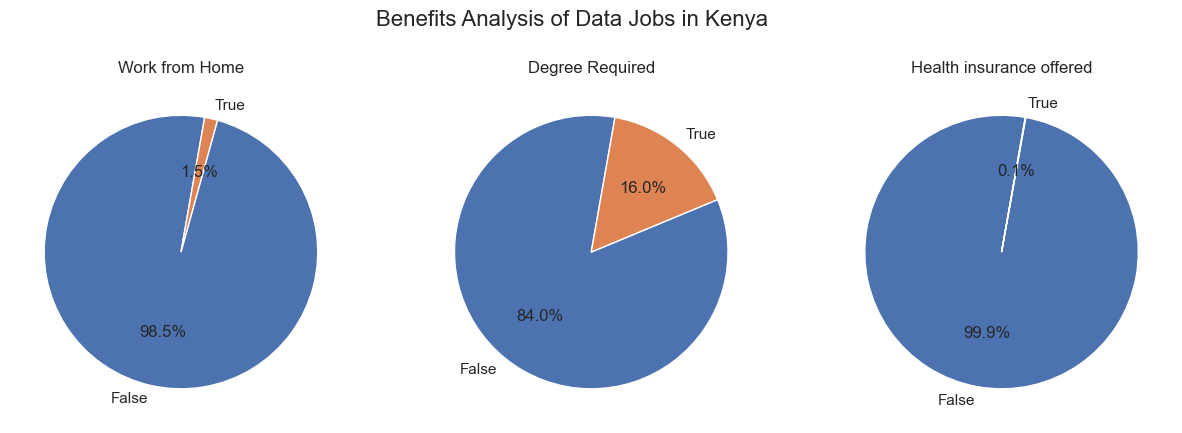

In [14]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15,5)
fig.suptitle('Benefits Analysis of Data Jobs in Kenya', fontsize=16)
my_dict = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Degree Required',
    'job_health_insurance': 'Health insurance offered'
}

for i, (column, title) in enumerate(my_dict.items()):
    ax[i].pie(df_Kenya[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=80)
    ax[i].set_title(title)
plt.show()
